**RECESSION PREDICTION**

Step 1: Import Libraries and Load Data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import joblib

# Load data
data = pd.read_csv('/content/recession.csv')

# Drop 'Stock Market Index' from features
data.drop('stock_market_index', axis=1, inplace=True)

Step 2: Separate Features and Target Variable, Standardize Features

In [2]:
# Separate features and target variable
X = data.drop('recession', axis=1)
y = data['recession']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 3: Split Data into Training and Testing Sets

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Step 4: Train Multiple Models and Save Them

In [4]:
# Train multiple models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Save the models
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(gb_model, 'gb_model.pkl')
joblib.dump(lr_model, 'lr_model.pkl')

['lr_model.pkl']

Step 5: Function to Evaluate Accuracy of Each Model

In [5]:
# Function to evaluate accuracy of each model
def evaluate_models(X_test, y_test):
    models = {'Random Forest': rf_model, 'Gradient Boosting': gb_model, 'Logistic Regression': lr_model}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} Accuracy: {accuracy:.2f}')

# Evaluate accuracy
print('Accuracy Scores:')
evaluate_models(X_test, y_test)

Accuracy Scores:
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00
Logistic Regression Accuracy: 0.93


Step 6: Function to Plot ROC Curves for Each Model

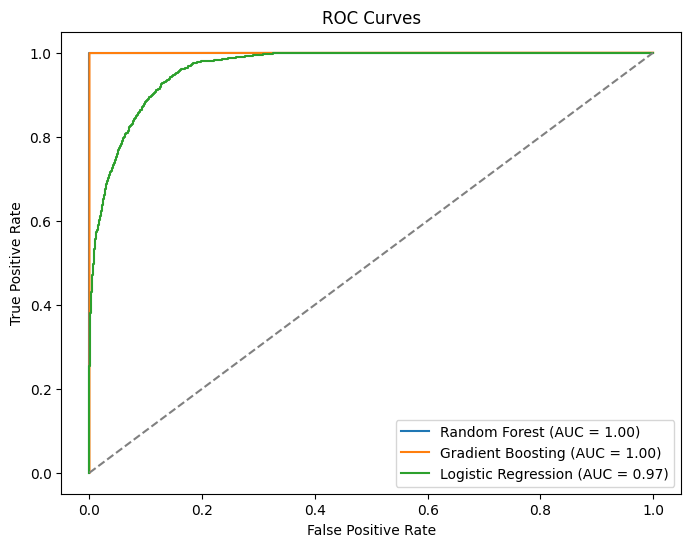

In [6]:
# Function to plot ROC curve for each model
def plot_roc_curves(X_test, y_test):
    models = {'Random Forest': rf_model, 'Gradient Boosting': gb_model, 'Logistic Regression': lr_model}
    plt.figure(figsize=(8, 6))
    for name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

# Plot ROC curves
plot_roc_curves(X_test, y_test)

Step 7: Function to Predict Recession Using an Ensemble of Models

In [7]:
# Function to predict recession using an ensemble of models
def predict_recession(input_data):
    # Load models
    rf_model = joblib.load('rf_model.pkl')
    gb_model = joblib.load('gb_model.pkl')
    lr_model = joblib.load('lr_model.pkl')

    # Transform input data
    input_df = pd.DataFrame([input_data])
    input_scaled = scaler.transform(input_df)  # Assuming scaler is saved separately

    # Make predictions
    rf_pred = rf_model.predict(input_scaled)[0]
    gb_pred = gb_model.predict(input_scaled)[0]
    lr_pred = lr_model.predict(input_scaled)[0]

    # Combine predictions (simple voting)
    ensemble_prediction = (rf_pred + gb_pred + lr_pred) / 3

    # Threshold for decision (adjust as needed)
    threshold = 0.5
    if ensemble_prediction >= threshold:
        return 1  # Recession predicted
    else:
        return 0  # No recession predicted

Step 8: Function to Handle Interactive Prediction

In [15]:
def predict_interactively():
    # Create widgets for input features
    gdp_growth_slider = widgets.FloatSlider(min=-10.0, max=10.0, step=0.1, description='GDP Growth:')
    unemployment_rate_slider = widgets.FloatSlider(min=0.0, max=100.0, step=0.1, description='Unemployment Rate:')
    inflation_rate_slider = widgets.FloatSlider(min=-5.0, max=15.0, step=0.1, description='Inflation Rate:')
    interest_rate_slider = widgets.FloatSlider(min=-1.0, max=10.0, step=0.1, description='Interest Rate:')
    predict_button = widgets.Button(description="Predict")

    # Define function to handle prediction and display
    def handle_prediction(button):
        # Retrieve values from sliders
        gdp_growth = gdp_growth_slider.value
        unemployment_rate = unemployment_rate_slider.value
        inflation_rate = inflation_rate_slider.value
        interest_rate = interest_rate_slider.value

        # Create input data dictionary
        input_data = {
            'gdp_growth': gdp_growth,
            'unemployment_rate': unemployment_rate,
            'inflation_rate': inflation_rate,
            'interest_rate': interest_rate
        }

        # Predict recession
        prediction = predict_recession(input_data)

        # Display prediction
        print(f'\nInput Data:\n'
              f'GDP Growth: {gdp_growth}\n'
              f'Unemployment Rate: {unemployment_rate}\n'
              f'Inflation Rate: {inflation_rate}\n'
              f'Interest Rate: {interest_rate}\n'
              f'\nRecession Prediction: {"Yes" if prediction == 1 else "No"}')

    # Attach the function to the button click event
    predict_button.on_click(handle_prediction)

    # Display widgets
    display(gdp_growth_slider, unemployment_rate_slider, inflation_rate_slider, interest_rate_slider, predict_button)

# Call function to start interactive prediction
predict_interactively()


FloatSlider(value=0.0, description='GDP Growth:', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='Unemployment Rate:')

FloatSlider(value=0.0, description='Inflation Rate:', max=15.0, min=-5.0)

FloatSlider(value=0.0, description='Interest Rate:', max=10.0, min=-1.0)

Button(description='Predict', style=ButtonStyle())


Input Data:
GDP Growth: 0.0
Unemployment Rate: 9.2
Inflation Rate: 15.0
Interest Rate: 0.0

Recession Prediction: No

Input Data:
GDP Growth: -5.7
Unemployment Rate: 86.0
Inflation Rate: 15.0
Interest Rate: 0.0

Recession Prediction: Yes

Input Data:
GDP Growth: -5.7
Unemployment Rate: 86.0
Inflation Rate: 15.0
Interest Rate: 10.0

Recession Prediction: Yes

Input Data:
GDP Growth: -5.7
Unemployment Rate: 0.0
Inflation Rate: 15.0
Interest Rate: 10.0

Recession Prediction: No

Input Data:
GDP Growth: 4.8
Unemployment Rate: 0.0
Inflation Rate: 15.0
Interest Rate: 10.0

Recession Prediction: No
